In [1]:
import pandas as pd
import sklearn
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier,ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score,mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight

2025-05-25 16:45:11.336338: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-25 16:45:11.456932: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-25 16:45:12.576326: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
Data=pd.read_excel("Processed.xlsx")

In [3]:
Data.columns

Index(['accessed_date', 'duration_(secs)', 'network_protocol', 'ip', 'bytes',
       'accessed_Ffom', 'age', 'gender', 'country', 'membership', 'language',
       'sales', 'returned', 'returned_amount', 'pay_method', 'Total_Sales',
       'new_language', 'Sales', 'normDuration', 'normBytes', 'new_country',
       'new_date', 'Label'],
      dtype='object')

In [4]:
Data

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,...,returned_amount,pay_method,Total_Sales,new_language,Sales,normDuration,normBytes,new_country,new_date,Label
0,2017-03-18 18:06:40.202,3366,2,81.136.18.247,1723,0,34,0,CA,0,...,0.000,Cash,1500.400,1,above_1000,0.533143,0.001817,2,3,0
1,2017-03-16 03:03:13.400,3086,2,46.248.189.251,589,0,20,1,US,0,...,0.000,Cash,1500.400,1,above_1000,0.453143,0.000601,14,3,0
2,2017-03-20 08:40:55.678,4295,2,45.19.208.35,307,2,0,1,CA,2,...,1080.306,Cash,1080.306,1,above_1000,0.798571,0.000299,2,3,0
3,2017-03-20 08:40:55.678,2239,2,45.210.174.91,391,2,0,0,AT,2,...,2677.500,Credit Card,2677.500,1,above_1000,0.211143,0.000389,0,3,0
4,2017-03-20 08:38:07.870,3806,3,45.21.22.245,76,3,0,0,NO,2,...,1140.304,Credit Card,1140.304,1,above_1000,0.658857,0.000051,9,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172833,2017-03-21 13:20:28.026,2337,2,12.31.244.14,40,3,0,1,CA,2,...,0.000,Credit Card,0.000,1,no_sales,0.239143,0.000013,2,3,5
172834,2017-03-18 21:27:30.328,4366,2,114.40.32.161,46,4,0,2,GB,1,...,0.000,Credit Card,0.000,1,no_sales,0.818857,0.000019,5,3,5
172835,2017-03-18 22:55:40.792,4922,2,188.230.14.49,264,3,0,2,IT,1,...,0.000,Debit Card,0.000,7,no_sales,0.977714,0.000253,7,3,5
172836,2017-03-18 22:56:00.381,1509,2,188.239.8.163,220,5,0,2,IT,1,...,0.000,Credit Card,0.000,7,no_sales,0.002571,0.000206,7,3,5


In [4]:
Data["Over100"]=(Data.Total_Sales>100).astype("int")

In [6]:
Data["returned"]=Data["returned"].replace({"Yes":1,"No":0})

In [7]:
Data["sold"]=(Data.Total_Sales>0).astype("int")

In [8]:
Data["BytesperDuration"]=Data.bytes/Data.loc[:,"duration_(secs)"]

In [9]:
Chosen_Columns=["network_protocol","accessed_Ffom","age","gender","membership","new_language","normDuration","returned","normBytes","new_country","BytesperDuration"]
categorical_col=["network_protocol","accessed_Ffom","gender","membership","new_language","new_country"]

In [353]:
Chosen_Columns=["age","membership","gender","new_language","new_country","returned"]
categorical_col=["membership","gender","new_language","new_country"]

In [10]:
df=Data.loc[:,Chosen_Columns]

In [10]:
df_pandas_encoded = pd.get_dummies(df, columns=categorical_col, drop_first=True)
print(f"One-Hot Encoded Data using Pandas:\n{df_pandas_encoded}\n")

encoder = OneHotEncoder(sparse_output=False)

one_hot_encoded = encoder.fit_transform(df[categorical_col])

one_hot_df = pd.DataFrame(one_hot_encoded, 
                          columns=encoder.get_feature_names_out(categorical_col))

df_sklearn_encoded = pd.concat([df.drop(categorical_col, axis=1), one_hot_df], axis=1)

print(f"One-Hot Encoded Data using Scikit-Learn:\n{df_sklearn_encoded}\n")

One-Hot Encoded Data using Pandas:
        age  normDuration  returned  normBytes  BytesperDuration  \
0        34      0.533143         0   0.001817          0.511884   
1        20      0.453143         0   0.000601          0.190862   
2         0      0.798571         1   0.000299          0.071478   
3         0      0.211143         1   0.000389          0.174632   
4         0      0.658857         1   0.000051          0.019968   
...     ...           ...       ...        ...               ...   
172833    0      0.239143         0   0.000013          0.017116   
172834    0      0.818857         0   0.000019          0.010536   
172835    0      0.977714         0   0.000253          0.053637   
172836    0      0.002571         0   0.000206          0.145792   
172837    0      0.505714         0   0.000159          0.053823   

        network_protocol_1  network_protocol_2  network_protocol_3  \
0                    False                True               False   
1       

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_sklearn_encoded, Data.loc[:,"Label"], test_size=0.33, random_state=42)

In [11]:
X_train

,age,normDuration,normBytes,network_protocol_0,network_protocol_1,network_protocol_2,network_protocol_3,accessed_Ffom_0,accessed_Ffom_1,accessed_Ffom_2,...,new_country_5,new_country_6,new_country_7,new_country_8,new_country_9,new_country_10,new_country_11,new_country_12,new_country_13,new_country_14
72904,0,0.168857,0.002400,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
171137,0,0.284000,0.000536,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20983,0,0.076857,0.000566,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141116,0,0.174000,0.000013,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
90548,0,0.813143,0.003985,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,9,0.536286,0.000013,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103694,0,0.262000,0.004795,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
131932,52,0.471429,0.000019,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
146867,0,0.184000,0.000723,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<Axes: >

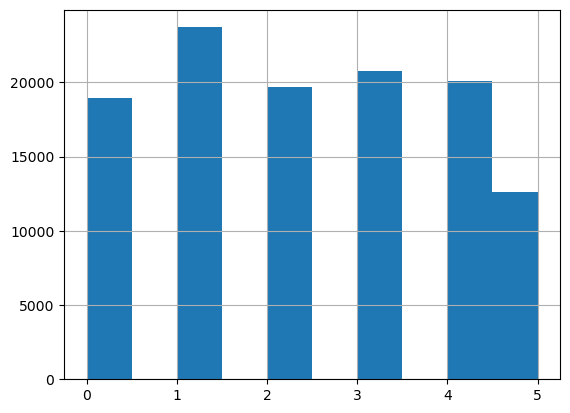

In [373]:
y_train.hist()

<Axes: >

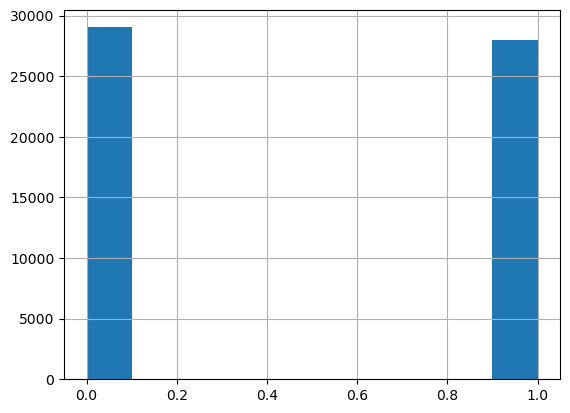

In [272]:
y_test.hist()

array([0.57512292, 3.82787915])

In [359]:
clf = DecisionTreeClassifier(class_weight="balanced")

clf = clf.fit(X_train, y_train)

print(clf.feature_importances_)  

pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
sklearn.metrics.f1_score(y_test,pred)

[0.26194037 0.00370148 0.01266201 0.37606405 0.01155806 0.02818404
 0.02775648 0.         0.00816506 0.01976608 0.00419453 0.00819829
 0.00520683 0.00548529 0.0119623  0.00956039 0.01588876 0.00916532
 0.00847405 0.01603106 0.01263551 0.01276246 0.00938229 0.01464807
 0.01905322 0.00781402 0.01210281 0.01368932 0.01303233 0.01491014
 0.00896954 0.01703584]
0.5716990725318652
[[10824 18216]
 [ 6213 21784]]


0.6407341500360308

In [299]:

model = SelectFromModel(clf, prefit=True)

X_new = model.transform(X_train)
X_new_test=model.transform(X_test)
 
feature_idx = model.get_support()
feature_name = X_train.columns[feature_idx]
feature_name

/home/mmk/anaconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
/home/mmk/anaconda3/envs/tf-gpu/lib/python3.12/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Index(['age', 'membership_1'], dtype='object')

In [360]:
clf = ExtraTreesClassifier(n_estimators=50)

clf = clf.fit(X_new, y_train)
pred=clf.predict(X_new_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
sklearn.metrics.f1_score(y_test,pred)

0.58260427441836
[[ 5233 23807]
 [    0 27997]]


0.7016704051327677

In [3]:
class_weight=compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight = {int(0):float(class_weight[0]),int(1):float(class_weight[1])}

Input=tf.keras.layers.Input((32,))
layer1=tf.keras.layers.Dense(1024, activation="relu", name="layer1")(Input)
layer1=tf.keras.layers.BatchNormalization()(layer1)

layer2=tf.keras.layers.Dense(256, activation="relu", name="layer2")(layer1)
layer2=tf.keras.layers.BatchNormalization()(layer2)

layer3=tf.keras.layers.Dense(64, activation="relu", name="layer3")(layer2)
layer3=tf.keras.layers.BatchNormalization()(layer3)

Output=tf.keras.layers.Dense(1,activation="sigmoid", name="Output")(layer3)

model=tf.keras.Model(inputs=Input,outputs=Output)



# model=tf.keras.Sequential(
#     [
#         tf.keras.layers.Dense(16, activation="relu", name="layer1"),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dense(8, activation="relu", name="layer2"),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.Dense(4, name="layer3"),
#     ])
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100, verbose=0, mode='max',restore_best_weights=True)
model.fit(X_train,y_train.to_numpy(),batch_size=1024,epochs=1000,validation_data=(X_test,y_test.to_numpy()),class_weight=class_weight,callbacks=[earlyStopping,])

NameError: name 'y_train' is not defined

In [106]:
model.summary()

Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 9)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 16)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 16)             │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 8)              │            32 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 4)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 810 (3.17 KB)

 Trainable params: 380 (1.48 KB)

 Non-trainable params: 48 (192.00 B)

 Optimizer params: 382 (1.50 KB)

In [370]:
model.evaluate(X_test,y_test.to_numpy())

1783/1783 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5934 - loss: 0.6271


[0.6282626390457153, 0.5901958346366882]

In [305]:
pred

array([[0.52438563],
       [0.48814684],
       [0.47426084],
       ...,
       [0.5718656 ],
       [0.47608662],
       [0.48424628]], dtype=float32)

In [371]:
pred=model.predict(X_test)
pred_class=pred>=0.5

print(accuracy_score(y_test,pred_class))
print(sklearn.metrics.confusion_matrix(y_test,pred_class))
sklearn.metrics.f1_score(y_test,pred_class)

1783/1783 ━━━━━━━━━━━━━━━━━━━━ 2s 918us/step
0.590195837789505
[[ 6713 22327]
 [ 1047 26950]]


0.6975179232342055

In [102]:
y_train[:10]

72904     2
171137    5
20983     0
141116    4
90548     2
63298     1
32526     1
23546     0
47045     1
60001     1
Name: Label, dtype: int64

In [96]:
X_train[np.isfinite(X_train).all(1)]

,network_protocol,accessed_Ffom,age,gender,membership,new_language,normDuration,normBytes,new_country
72904,2,1,0,0,2,1,0.168857,0.002400,10
171137,2,0,0,2,1,4,0.284000,0.000536,6
20983,2,0,0,0,0,1,0.076857,0.000566,1
141116,2,4,0,0,2,1,0.174000,0.000013,7
90548,2,2,0,0,2,1,0.813143,0.003985,2
...,...,...,...,...,...,...,...,...,...
119879,0,0,9,1,2,1,0.536286,0.000013,2
103694,2,3,0,0,2,1,0.262000,0.004795,11
131932,0,1,52,1,2,3,0.471429,0.000019,3
146867,2,0,0,0,0,1,0.184000,0.000723,4


In [247]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5])

In [375]:
class_weight_list=compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight={}
for i in range(len(class_weight_list)):    
    class_weight[i] = class_weight_list[i]

Input=tf.keras.layers.Input((32,))
layer1=tf.keras.layers.Dense(1024, activation="relu", name="layer1")(Input)
layer1=tf.keras.layers.BatchNormalization()(layer1)

layer2=tf.keras.layers.Dense(256, activation="relu", name="layer2")(layer1)
layer2=tf.keras.layers.BatchNormalization()(layer2)

layer3=tf.keras.layers.Dense(64, activation="relu", name="layer3")(layer2)
layer3=tf.keras.layers.BatchNormalization()(layer3)

Output=tf.keras.layers.Dense(6,activation="softmax", name="Output")(layer3)

model=tf.keras.Model(inputs=Input,outputs=Output)



# tf.keras.metrics.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='sparse_categorical_accuracy', patience=100, verbose=0, mode='max',restore_best_weights=True)
model.fit(X_train.to_numpy(),y_train.to_numpy(),batch_size=1024,epochs=1000,validation_data=(X_test,y_test.to_numpy()),class_weight =class_weight,callbacks=[earlyStopping,])

Epoch 1/1000
114/114 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.5434 - sparse_categorical_accuracy: 0.2679 - val_loss: 1.5850 - val_sparse_categorical_accuracy: 0.2748
Epoch 2/1000
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4428 - sparse_categorical_accuracy: 0.2804 - val_loss: 1.5321 - val_sparse_categorical_accuracy: 0.2775
Epoch 3/1000
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4372 - sparse_categorical_accuracy: 0.2877 - val_loss: 1.5101 - val_sparse_categorical_accuracy: 0.2788
Epoch 4/1000
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4346 - sparse_categorical_accuracy: 0.2858 - val_loss: 1.5061 - val_sparse_categorical_accuracy: 0.2812
Epoch 5/1000
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4332 - sparse_categorical_accuracy: 0.2895 - val_loss: 1.5044 - val_sparse_categorical_accuracy: 0.2805
Epoch 6/1000
114/114 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.4345 - sparse_categorical_accuracy: 0.2901 - val_loss: 1.5028 - val_sparse_categorical_accuracy

In [251]:
model.summary()

Model: "functional_86"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_49 (InputLayer)     │ (None, 44)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer1 (Dense)                  │ (None, 1024)           │        46,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_121         │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer2 (Dense)                  │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_122         │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer3 (Dense)                  │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_123         │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 6)              │           390 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 986,708 (3.76 MB)

 Trainable params: 328,006 (1.25 MB)

 Non-trainable params: 2,688 (10.50 KB)

 Optimizer params: 656,014 (2.50 MB)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(df.loc[df.gender!=2], Data.loc[Data.gender!=2,"sold"], test_size=0.33, random_state=42)

In [126]:
class_weight

{0: 26.894373401534526, 1: 0.5094717156644251}

In [31]:
X_train.columns

Index(['network_protocol', 'accessed_Ffom', 'age', 'new_language',
       'normDuration', 'returned', 'normBytes', 'new_country',
       'BytesperDuration'],
      dtype='object')

In [36]:
df.accessed_Ffom.unique()

array([0, 2, 3, 6, 5, 1, 4])

In [33]:
Input={}
t_Input={}
for col in X_train.columns:
    Input[col]=X_train.loc[:,col]
    t_Input[col]=X_test.loc[:,col]

In [34]:
Input.keys()

dict_keys(['network_protocol', 'accessed_Ffom', 'age', 'new_language', 'normDuration', 'returned', 'normBytes', 'new_country', 'BytesperDuration'])

In [13]:
class_weight_list=compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weight={}
for i in range(len(class_weight_list)):    
    class_weight[i] = class_weight_list[i]

# class_weight={0:1000,1:0.5}

Emb_size=10

Age=tf.keras.layers.Input((1,),name="age")
# membership=tf.keras.layers.Input((1,),name="membership")
# gender=tf.keras.layers.Input((1,),name="gender")
language=tf.keras.layers.Input((1,),name="language")
network=tf.keras.layers.Input((1,),name="network")
returned=tf.keras.layers.Input((1,),name="returned")
bytesperdur=tf.keras.layers.Input((1,),name="bytesperduration")
# bytesperdur_reshape=tf.keras.layers.Reshape((1,1))(bytesperdur)
bytes=tf.keras.layers.Input((1,),name="bytes")
# bytes_reshape=tf.keras.layers.Reshape((1,1))(bytes)


# age_emb=tf.keras.layers.Embedding(input_dim=53,output_dim=10)(Age)
age_emb=tf.keras.layers.Dense(Emb_size, activation="tanh", name="age_emb")(Age)
# age_emb=tf.keras.layers.BatchNormalization()(age_emb)
age_emb=tf.keras.layers.Reshape((1,Emb_size))(age_emb)

bytes_emb=tf.keras.layers.Dense(Emb_size, activation="tanh", name="bytes_emb")(bytes)
# bytes_emb=tf.keras.layers.BatchNormalization()(bytes_emb)
bytes_emb=tf.keras.layers.Reshape((1,Emb_size))(bytes_emb)

bytesperdur_emb=tf.keras.layers.Dense(Emb_size, activation="tanh", name="bytesperdur_emb")(bytesperdur)
# bytesperdur_emb=tf.keras.layers.BatchNormalization()(bytesperdur_emb)
bytesperdur_emb=tf.keras.layers.Reshape((1,Emb_size))(bytesperdur_emb)


net_emb=tf.keras.layers.Embedding(input_dim=4,output_dim=Emb_size)(network)
returned_emb=tf.keras.layers.Embedding(input_dim=2,output_dim=Emb_size)(returned)
lan_emb=tf.keras.layers.Embedding(input_dim=9,output_dim=Emb_size)(language)

conc=tf.keras.layers.Concatenate()([age_emb,net_emb,returned_emb,lan_emb,bytesperdur_emb,bytes_emb])


layer1=tf.keras.layers.Dense(1024, activation="relu", name="layer1")(conc)
layer1=tf.keras.layers.BatchNormalization()(layer1)

layer2=tf.keras.layers.Dense(512, activation="relu", name="layer2")(layer1)
layer2=tf.keras.layers.BatchNormalization()(layer2)

layer3=tf.keras.layers.Dense(256, activation="relu", name="layer3")(layer2)
layer3=tf.keras.layers.BatchNormalization()(layer3)

Output=tf.keras.layers.Dense(1,activation="sigmoid", name="Output")(layer3)

model=tf.keras.Model(inputs=[Age,network,returned,language,bytesperdur,bytes],outputs=Output)






Input={
    "age":X_train.loc[:,"age"],
    "language":X_train.loc[:,"new_language"],
    "network":X_train.loc[:,"network_protocol"],
    "bytesperduration":X_train.loc[:,"BytesperDuration"],
    "bytes":X_train.loc[:,"normBytes"],
    "returned":X_train.loc[:,"returned"],
}

t_Input={
     "age":X_test.loc[:,"age"],
    "language":X_test.loc[:,"new_language"],
    "network":X_test.loc[:,"network_protocol"],
    "bytesperduration":X_test.loc[:,"BytesperDuration"],
    "bytes":X_test.loc[:,"normBytes"],
    "returned":X_test.loc[:,"returned"],
}

# tf.keras.metrics.SparseCategoricalCrossentropy(from_logits=True)
model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=100, verbose=0, mode='max',restore_best_weights=True)
model.fit(Input,y_train.to_numpy().reshape((-1,1)),batch_size=1024,epochs=100000,validation_data=(t_Input,y_test.to_numpy().reshape((-1,1))),class_weight=class_weight,callbacks=[earlyStopping])

2025-05-25 16:47:40.747297: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-25 16:47:40.782085: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-25 16:47:40.782140: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-25 16:47:40.786394: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-05-25 16:47:40.786461: I external/local_xla/xla/stream_executor

Epoch 1/100000


I0000 00:00:1748180863.339512    5922 service.cc:145] XLA service 0x7f67b4004190 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1748180863.339939    5922 service.cc:153]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2025-05-25 16:47:43.423351: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2025-05-25 16:47:43.751368: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:465] Loaded cuDNN version 8907
I0000 00:00:1748180865.168638    5922 asm_compiler.cc:369] ptxas warning : Registers are spilled to local memory in function 'input_slice_fusion_1', 4 bytes spill stores, 4 bytes spill loads

I0000 00:00:1748180865.173057    5922 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


KeyboardInterrupt: 

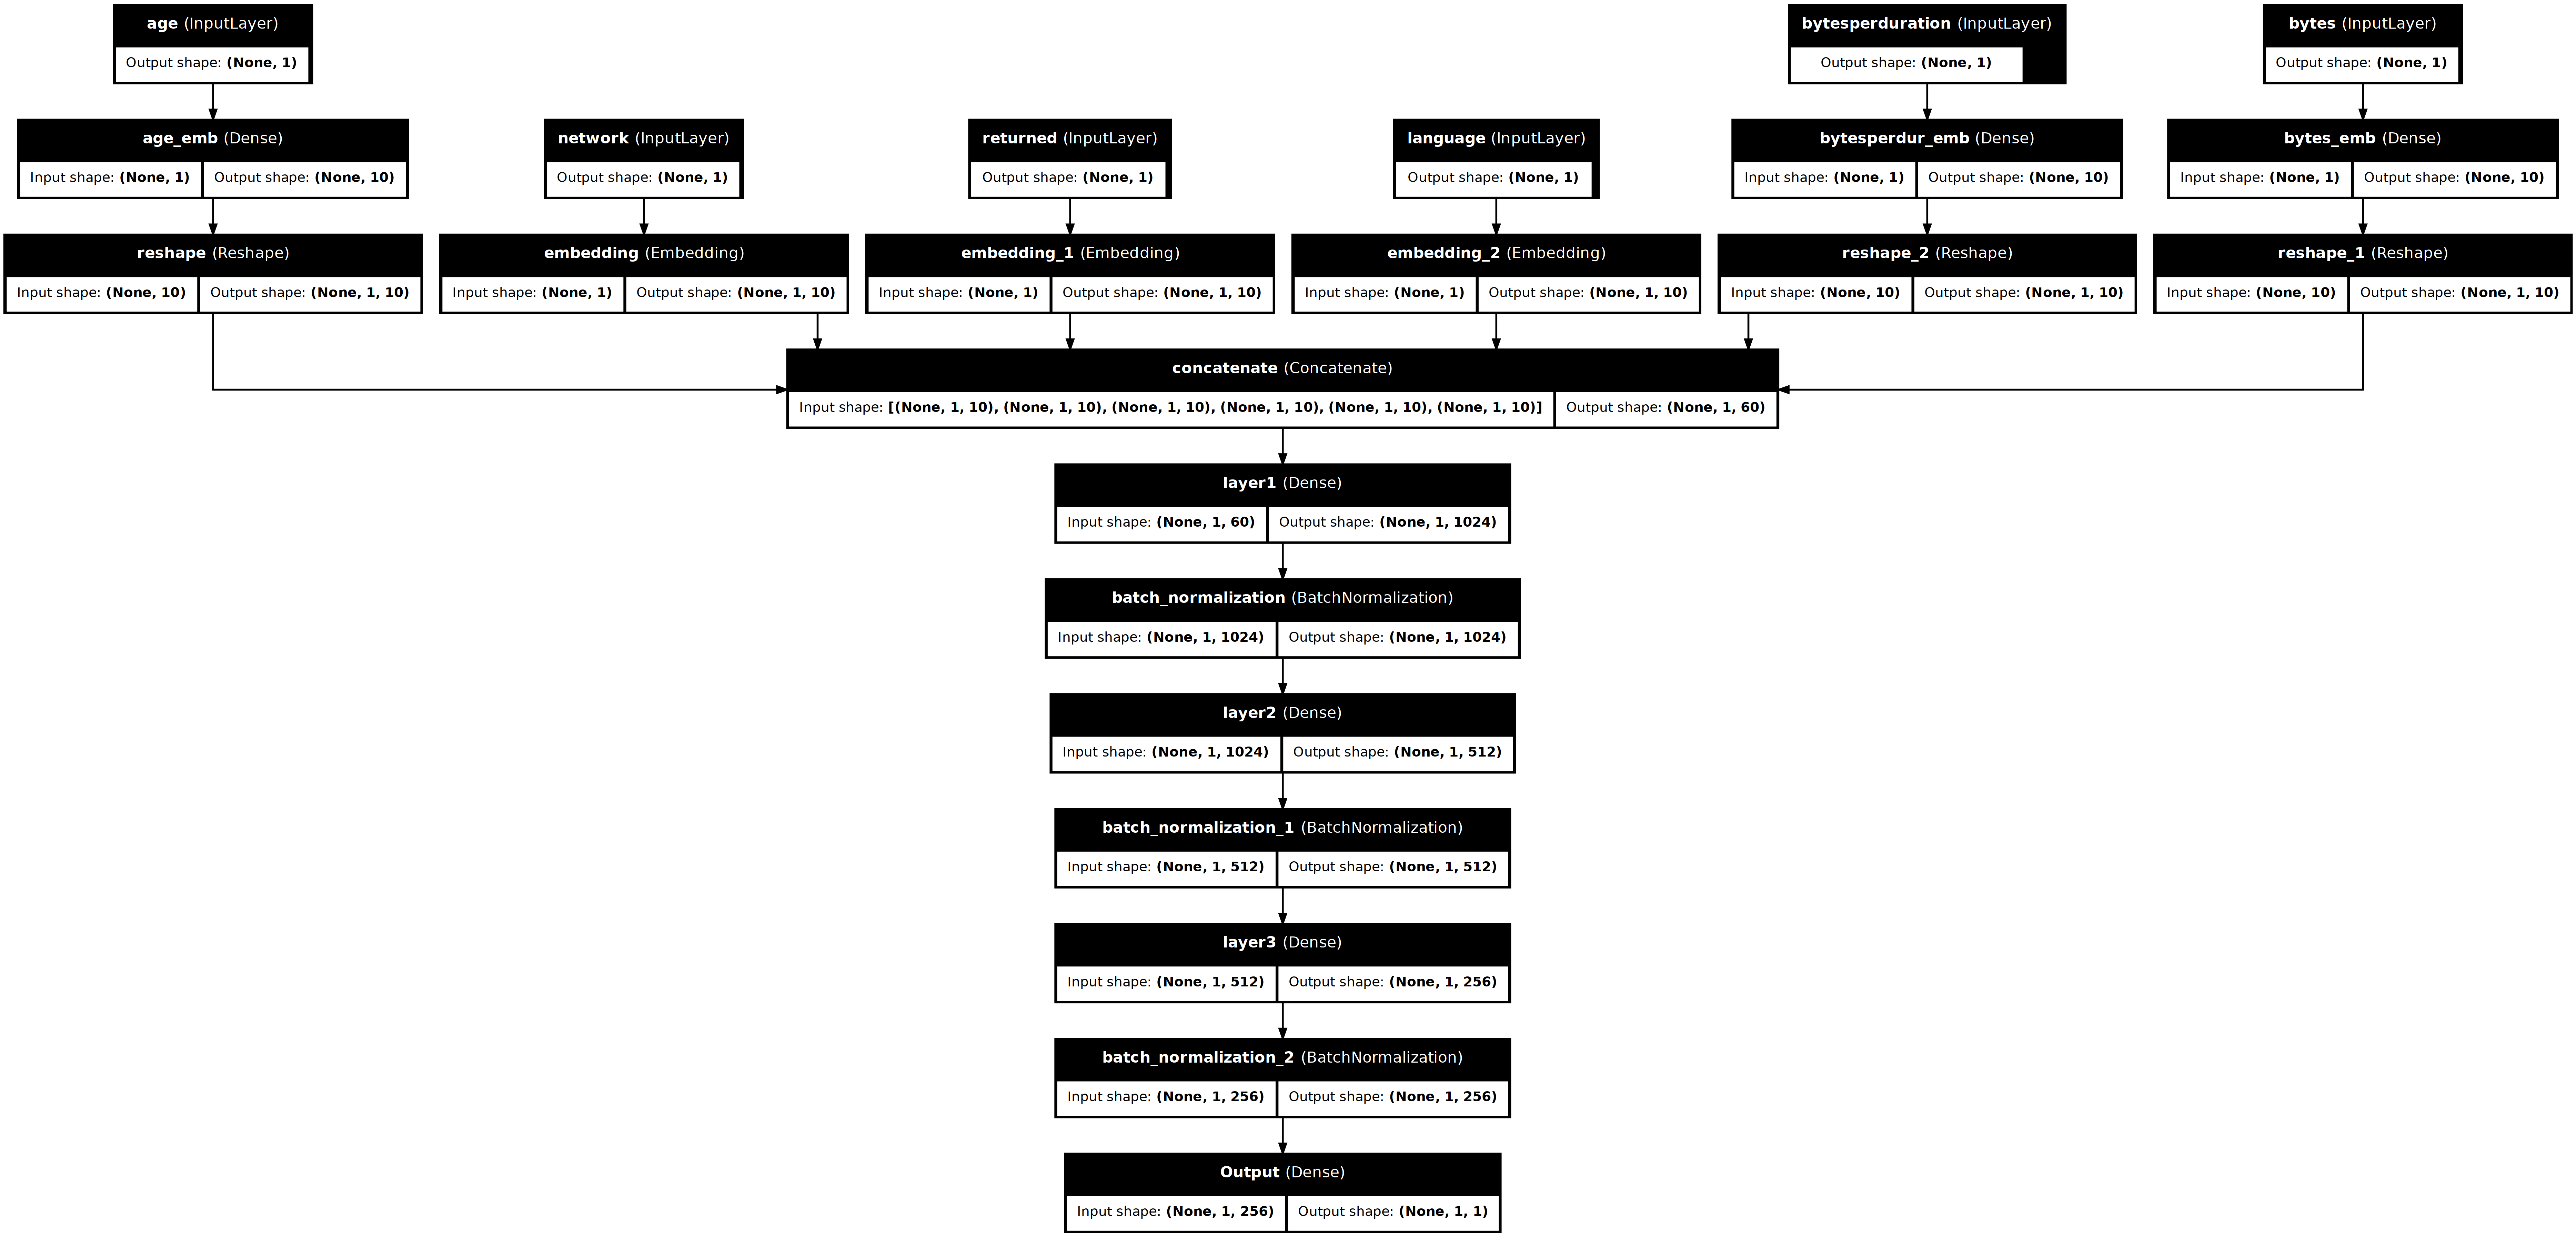

In [15]:
tf.keras.utils.plot_model(model, to_file="model_shape.png", show_shapes=True,show_layer_names=True)

In [327]:
model.summary()

Model: "functional_109"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ age (InputLayer)    │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ membership          │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ gender (InputLayer) │ (None, 1)         │          0 │ -                 │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ language            │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ country             │ (None, 1)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_10        │ (None, 1, 10)     │        530 │ age[0][0]         │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_11        │ (None, 1, 10)     │         30 │ membership[0][0]  │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_12        │ (None, 1, 10)     │         30 │ gender[0][0]      │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_13        │ (None, 1, 10)     │         90 │ language[0][0]    │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ embedding_14        │ (None, 1, 10)     │        140 │ country[0][0]     │
│ (Embedding)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 1, 50)     │          0 │ embedding_10[0][… │
│ (Concatenate)       │                   │            │ embedding_11[0][… │
│                     │                   │            │ embedding_12[0][… │
│                     │                   │            │ embedding_13[0][… │
│                     │                   │            │ embedding_14[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer1 (Dense)      │ (None, 1, 1024)   │     52,224 │ concatenate_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 1024)   │      4,096 │ layer1[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer2 (Dense)      │ (None, 1, 256)    │    262,400 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 256)    │      1,024 │ layer2[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ layer3 (Dense)      │ (None, 1, 64)     │     16,448 │ batch_normalizat… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 1, 64)     │        256 │ layer3[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 337,333 (1.29 MB)

 Trainable params: 334,645 (1.28 MB)

 Non-trainable params: 2,688 (10.50 KB)

In [341]:
pred_class

array([[[ True]],

       [[ True]],

       [[ True]],

       ...,

       [[ True]],

       [[ True]],

       [[ True]]])

In [63]:
model.evaluate(t_Input,y_test.to_numpy().reshape((-1,1)))

1783/1783 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8892 - loss: 1.6679


[1.6553807258605957, 0.8902291655540466]

In [69]:
pred=model.predict(t_Input)
pred_class=list(map(lambda x: int(x[0][0]),(pred>=0.5)))

print(accuracy_score(y_test,pred_class))
print(sklearn.metrics.confusion_matrix(y_test,pred_class))
sklearn.metrics.f1_score(y_test,pred_class)

1783/1783 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step
0.9246103406560654
[[ 5073  1075]
 [ 3225 47664]]


0.9568394427269442

In [70]:
model.save("0-9568--mlp.keras")

In [17]:
X_test.loc[(y_test!=pred_class)&(y_test==0)]

NameError: name 'pred_class' is not defined

In [45]:
model=tf.keras.models.load_model("0-9568--mlp.keras")

1783/1783 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
0.9246103406560654
[[ 5073  1075]
 [ 3225 47664]]
0.9568394427269442
0.880886582496843


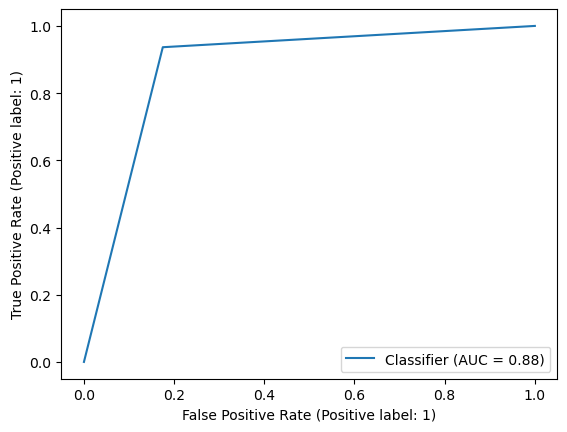

In [86]:
pred=model.predict(t_Input)
pred_class=list(map(lambda x: int(x[0][0]),(pred>=0.5)))

print(accuracy_score(y_test,pred_class))
print(sklearn.metrics.confusion_matrix(y_test,pred_class))
print(sklearn.metrics.f1_score(y_test,pred_class))
print(sklearn.metrics.roc_auc_score(y_test,pred_class))
sklearn.metrics.RocCurveDisplay.from_predictions(y_test, pred_class)
plt.show()

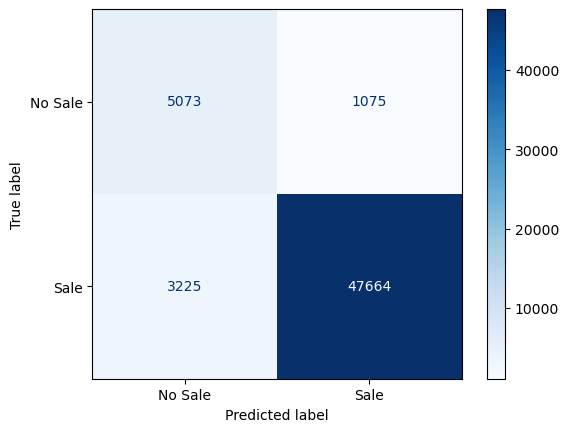

In [88]:
build_confusion_matrix(y_test,pred_class)

In [18]:
Chosen_Columns

['network_protocol',
 'accessed_Ffom',
 'age',
 'gender',
 'membership',
 'new_language',
 'normDuration',
 'returned',
 'normBytes',
 'new_country',
 'BytesperDuration']

In [26]:
clf = DecisionTreeClassifier(class_weight="balanced")

clf = clf.fit(X_train, y_train)

print(clf.feature_importances_)  

pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
sklearn.metrics.f1_score(y_test,pred)

[7.01090117e-03 2.30101117e-02 3.47550749e-02 7.37283107e-01
 5.98918254e-04 7.99269331e-03 1.02050830e-01 5.46532799e-02
 3.26450836e-02]
0.9686343952171398
[[ 5280   868]
 [  921 49968]]


0.9824133693782255

In [8]:
import itertools

In [18]:
Chosen_Columns

['network_protocol',
 'accessed_Ffom',
 'age',
 'new_language',
 'normDuration',
 'returned',
 'normBytes',
 'new_country',
 'BytesperDuration']

In [135]:
iter_res

array([], dtype=float64)

In [20]:
clf = DecisionTreeClassifier(class_weight="balanced")

clf = clf.fit(X_train.loc[:,Chosen_Columns], y_train)
pred=clf.predict(X_test.loc[:,Chosen_Columns])
print(accuracy_score(y_test,pred),sklearn.metrics.f1_score(y_test,pred))

0.9397408699616039 0.9662526388138838


In [17]:
current_cols=Chosen_Columns.copy()
Results=[]
for i in range(9):
    iter_res=[]
    iter_cols=[]
    for cols in itertools.combinations(current_cols,8-i):
        clf = DecisionTreeClassifier(class_weight="balanced")

        clf = clf.fit(X_train.loc[:,cols], y_train)
        
        # print(clf.feature_importances_)  
        
        pred=clf.predict(X_test.loc[:,cols])
        # print(accuracy_score(y_test,pred))
        # print(sklearn.metrics.confusion_matrix(y_test,pred))
        iter_cols.append(cols)
        iter_res.append([accuracy_score(y_test,pred),sklearn.metrics.f1_score(y_test,pred)])
    iter_res=np.array(iter_res)
    iter_max=np.argmax(iter_res[:,1])
    current_cols=iter_cols[iter_max]
    Results.append([9-i,current_cols,iter_res[iter_max,0],iter_res[iter_max,1]])
    print(Results[-1])
    

[9, ('network_protocol', 'age', 'new_language', 'normDuration', 'returned', 'normBytes', 'new_country', 'BytesperDuration'), 0.9407402212598839, 0.9668022079478265]
[8, ('network_protocol', 'age', 'normDuration', 'returned', 'normBytes', 'new_country', 'BytesperDuration'), 0.9401616494556165, 0.9664434809112272]
[7, ('network_protocol', 'age', 'normDuration', 'returned', 'normBytes', 'new_country'), 0.9394252853410944, 0.9660218522270193]
[6, ('network_protocol', 'age', 'normDuration', 'returned', 'normBytes'), 0.9396707400459351, 0.9659916387464051]
[5, ('network_protocol', 'age', 'normDuration', 'normBytes'), 0.9354454126268913, 0.9635698031067578]
[4, ('age', 'normDuration', 'normBytes'), 0.9292915125269562, 0.9599857127265872]
[3, ('age', 'normBytes'), 0.9332713852411593, 0.9618017222344889]
[2, ('normBytes',), 0.8911934358398934, 0.9362886005256242]


ValueError: at least one array or dtype is required

In [139]:
clf = DecisionTreeClassifier(class_weight="balanced")

clf = clf.fit(X_train.loc[:,['network_protocol', 'accessed_Ffom', 'age', 'normDuration', 'normBytes', 'new_country', 'BytesperDuration']], y_train)

# print(clf.feature_importances_)  

pred=clf.predict(X_test.loc[:,['network_protocol', 'accessed_Ffom', 'age', 'normDuration', 'normBytes', 'new_country', 'BytesperDuration']])
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
sklearn.metrics.f1_score(y_test,pred)

0.9676995849020176
[[   52   881]
 [  792 50070]]


0.9835679137241806

In [89]:
Chosen_Columns

['network_protocol',
 'accessed_Ffom',
 'age',
 'gender',
 'membership',
 'new_language',
 'normDuration',
 'normBytes',
 'new_country',
 'BytesperDuration']

In [90]:
Chosen_Columns.pop(3)
Chosen_Columns.pop(3)

'membership'

In [76]:
Chosen_Columns.append("BytesperDuration")

In [12]:
from sklearn.feature_selection import SequentialFeatureSelector

In [43]:
Results

NameError: name 'Results' is not defined

In [14]:
Chosen_Columns

['network_protocol',
 'accessed_Ffom',
 'age',
 'new_language',
 'normDuration',
 'returned',
 'normBytes',
 'new_country',
 'BytesperDuration']

In [15]:
Results=[]
for i in range(1,11):
    clf = DecisionTreeClassifier(class_weight="balanced")
    
    sfs_forward = SequentialFeatureSelector(
        clf, n_features_to_select=i, direction="forward"
    ).fit(X_train, y_train)
    n_x_test=sfs_forward.transform(X_test)
    n_x_train=sfs_forward.transform(X_train)

    clf = DecisionTreeClassifier(class_weight="balanced")
    clf = clf.fit(n_x_train, y_train)
    pred=clf.predict(n_x_test)
    print(accuracy_score(y_test,pred))
    print(sklearn.metrics.confusion_matrix(y_test,pred))
    Results.append([i,X_train.loc[:,Chosen_Columns].columns[sfs_forward.get_support()],accuracy_score(y_test,pred),sklearn.metrics.confusion_matrix(y_test,pred),sklearn.metrics.f1_score(y_test,pred)])

0.8911934358398934
[[ 5230   918]
 [ 5288 45601]]
0.9332713852411593
[[ 5315   833]
 [ 2973 47916]]
0.9287830706383575
[[ 4603  1545]
 [ 2517 48372]]
0.9361116468257447
[[ 4668  1480]
 [ 2164 48725]]
0.9399687921875274
[[ 4724  1424]
 [ 2000 48889]]
0.9403545067237057
[[ 4638  1510]
 [ 1892 48997]]
0.9403019092869541
[[ 4647  1501]
 [ 1904 48985]]
0.9405298315128776
[[ 4443  1705]
 [ 1687 49202]]


ValueError: n_features_to_select must be < n_features.

In [16]:
Results

[[1,
  Index(['normBytes'], dtype='object'),
  0.8911934358398934,
  array([[ 5230,   918],
         [ 5288, 45601]]),
  0.9362886005256242],
 [2,
  Index(['age', 'normBytes'], dtype='object'),
  0.9332713852411593,
  array([[ 5315,   833],
         [ 2973, 47916]]),
  0.9618017222344889],
 [3,
  Index(['age', 'normBytes', 'BytesperDuration'], dtype='object'),
  0.9287830706383575,
  array([[ 4603,  1545],
         [ 2517, 48372]]),
  0.9597047794774122],
 [4,
  Index(['network_protocol', 'age', 'normBytes', 'BytesperDuration'], dtype='object'),
  0.9361116468257447,
  array([[ 4668,  1480],
         [ 2164, 48725]]),
  0.9639543395255902],
 [5,
  Index(['network_protocol', 'age', 'returned', 'normBytes', 'BytesperDuration'], dtype='object'),
  0.9399687921875274,
  array([[ 4724,  1424],
         [ 2000, 48889]]),
  0.9661666765478943],
 [6,
  Index(['network_protocol', 'age', 'new_language', 'returned', 'normBytes',
         'BytesperDuration'],
        dtype='object'),
  0.940354506

In [75]:
clf = DecisionTreeClassifier(class_weight="balanced")
clf = clf.fit(X_train[Chosen_Columns], y_train)
pred=clf.predict(X_test[Chosen_Columns])
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
sklearn.metrics.f1_score(y_test,pred)

0.69451408734681
[[ 6073    75]
 [17349 33540]]


0.793808577108776

In [94]:
Data

,accessed_date,duration_(secs),network_protocol,ip,bytes,accessed_Ffom,age,gender,country,membership,...,new_language,Sales,normDuration,normBytes,new_country,new_date,Label,Over100,sold,BytesperDuration
0,2017-03-18 18:06:40.202,3366,2,81.136.18.247,1723,0,34,0,CA,0,...,1,above_1000,0.533143,0.001817,2,3,0,1,1,0.511884
1,2017-03-16 03:03:13.400,3086,2,46.248.189.251,589,0,20,1,US,0,...,1,above_1000,0.453143,0.000601,14,3,0,1,1,0.190862
2,2017-03-20 08:40:55.678,4295,2,45.19.208.35,307,2,0,1,CA,2,...,1,above_1000,0.798571,0.000299,2,3,0,1,1,0.071478
3,2017-03-20 08:40:55.678,2239,2,45.210.174.91,391,2,0,0,AT,2,...,1,above_1000,0.211143,0.000389,0,3,0,1,1,0.174632
4,2017-03-20 08:38:07.870,3806,3,45.21.22.245,76,3,0,0,NO,2,...,1,above_1000,0.658857,0.000051,9,3,0,1,1,0.019968
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172833,2017-03-21 13:20:28.026,2337,2,12.31.244.14,40,3,0,1,CA,2,...,1,no_sales,0.239143,0.000013,2,3,5,0,0,0.017116
172834,2017-03-18 21:27:30.328,4366,2,114.40.32.161,46,4,0,2,GB,1,...,1,no_sales,0.818857,0.000019,5,3,5,0,0,0.010536
172835,2017-03-18 22:55:40.792,4922,2,188.230.14.49,264,3,0,2,IT,1,...,7,no_sales,0.977714,0.000253,7,3,5,0,0,0.053637
172836,2017-03-18 22:56:00.381,1509,2,188.239.8.163,220,5,0,2,IT,1,...,7,no_sales,0.002571,0.000206,7,3,5,0,0,0.145792


In [12]:
from xgboost import XGBClassifier

In [11]:
X_train, X_test, y_train, y_test = train_test_split(df, Data.loc[:,"sold"], test_size=0.33, random_state=42)

In [27]:
classes_weights = sklearn.utils.class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)

In [28]:
bst = XGBClassifier(n_estimators=1000, max_depth=100, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train,sample_weight=classes_weights)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=100, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1000, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [29]:
preds = bst.predict(X_test)
print(accuracy_score(y_test,preds))
print(sklearn.metrics.confusion_matrix(y_test,preds))
sklearn.metrics.f1_score(y_test,preds)

0.9425285341094377
[[ 4423  1725]
 [ 1553 49336]]


0.967846983815596

In [5]:
Chosen_Columns=["network_protocol","accessed_Ffom","age","gender","membership","new_language","normDuration","returned","normBytes","new_country","BytesperDuration"]
Chosen_Columns.pop(3)
Chosen_Columns.pop(3)
df=Data.loc[:,Chosen_Columns]
X_train, X_test, y_train, y_test = train_test_split(df, Data.loc[:,"sold"], test_size=0.33, random_state=42)

KeyError: "['BytesperDuration'] not in index"

In [94]:
Chosen_Columns=["network_protocol","age","new_language","returned","normBytes","BytesperDuration"]
# Chosen_Columns.pop(3)
# Chosen_Columns.pop(3)
df=Data.loc[:,Chosen_Columns]
X_train, X_test, y_train, y_test = train_test_split(df, Data.loc[:,"sold"], test_size=0.33, random_state=42)

In [29]:
Chosen_Columns=["network_protocol","new_language","returned","normBytes","BytesperDuration"]
# Chosen_Columns.pop(3)
# Chosen_Columns.pop(3)
df=Data.loc[:,Chosen_Columns]
X_train, X_test, y_train, y_test = train_test_split(df, Data.loc[:,"sold"], test_size=0.33, random_state=42)

In [91]:
Chosen_Columns=["network_protocol","age","new_language","returned"]
# Chosen_Columns.pop(3)
# Chosen_Columns.pop(3)
df=Data.loc[:,Chosen_Columns]
X_train, X_test, y_train, y_test = train_test_split(df, Data.loc[:,"sold"], test_size=0.33, random_state=42)

In [65]:
from sklearn.preprocessing import LabelEncoder

In [87]:
label_encoder = LabelEncoder()
y=label_encoder.fit_transform(pd.cut(Data.loc[:,"BytesperDuration"], 2, retbins=True)[0])

In [91]:
Data.loc[:,"BytesperDuration"].

<bound method hist_series of 0         0.511884
1         0.190862
2         0.071478
3         0.174632
4         0.019968
            ...   
172833    0.017116
172834    0.010536
172835    0.053637
172836    0.145792
172837    0.053823
Name: BytesperDuration, Length: 172838, dtype: float64>

In [88]:
np.unique(y,return_counts=True)

(array([0, 1]), array([172826,     12]))

In [33]:
X_train

,network_protocol,age,new_language,returned
72904,2,0,1,1
171137,2,0,4,0
20983,2,0,1,0
141116,2,0,1,0
90548,2,0,1,0
...,...,...,...,...
119879,0,9,1,1
103694,2,0,1,1
131932,0,52,3,0
146867,2,0,1,0


In [26]:
y_train

72904     1
171137    0
20983     1
141116    1
90548     1
         ..
119879    1
103694    1
131932    1
146867    1
121958    1
Name: sold, Length: 115801, dtype: int64

0.9405473639917948
[[ 4641  1507]
 [ 1884 49005]]
0.9665585152020196
0.8589289412131291


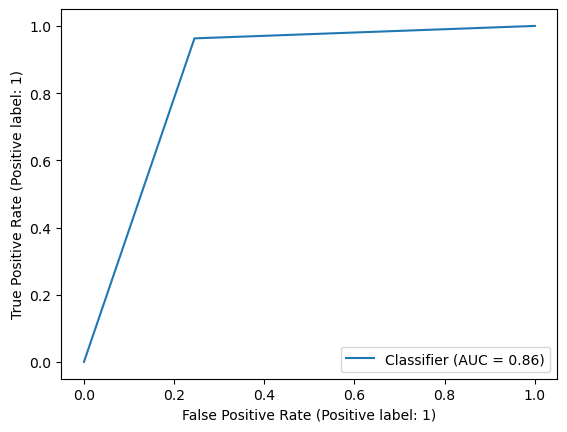

In [97]:
clf = DecisionTreeClassifier(class_weight="balanced")
clf = clf.fit(X_train, y_train)
pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
print(sklearn.metrics.f1_score(y_test,pred))
print(sklearn.metrics.roc_auc_score(y_test,pred))
sklearn.metrics.RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

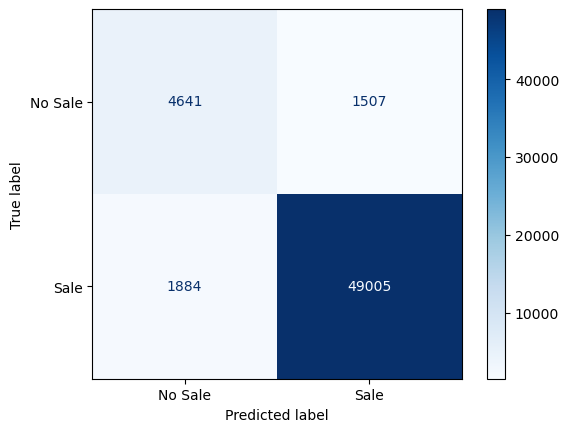

In [98]:
build_confusion_matrix(y_test,pred)

In [41]:
from pickle import dump
def save_scikit_model(model_name,clf):
    with open(model_name+".pkl", "wb") as f:
        dump(clf, f, protocol=5)

In [42]:
save_scikit_model("decision_tree",clf)

In [17]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,CategoricalNB

In [35]:
pd.concat([X_train[y_train==1][:6000],X_train[y_train==0]])

,network_protocol,age,new_language,returned
72904,2,0,1,1
20983,2,0,1,0
141116,2,0,1,0
90548,2,0,1,0
63298,2,25,4,0
...,...,...,...,...
154969,2,0,1,0
166845,2,0,1,0
156730,2,0,1,0
159765,2,0,1,0


In [96]:
pd.concat([y_train[y_train==1][:6000],y_train[y_train==0]])

72904     1
20983     1
141116    1
90548     1
63298     1
         ..
154969    0
166845    0
156730    0
159765    0
168266    0
Name: sold, Length: 18626, dtype: int64

In [90]:
X_test

,network_protocol,age,new_language,returned,normBytes,BytesperDuration
146855,2,10,1,0,0.000013,0.017160
71437,2,0,1,0,0.004349,1.046363
71378,2,0,6,0,0.003384,1.911765
134286,0,52,1,0,0.002400,1.471123
19951,2,0,7,0,0.003132,0.878499
...,...,...,...,...,...,...
6728,2,0,1,0,0.003095,0.643062
34679,2,52,1,0,0.002282,0.937826
1945,2,40,1,1,0.000069,0.029572
148084,2,0,1,0,0.000019,0.012124


0.7121166961796729
[[ 5919   229]
 [16191 34698]]
0.8086603896709238
0.82229452686472


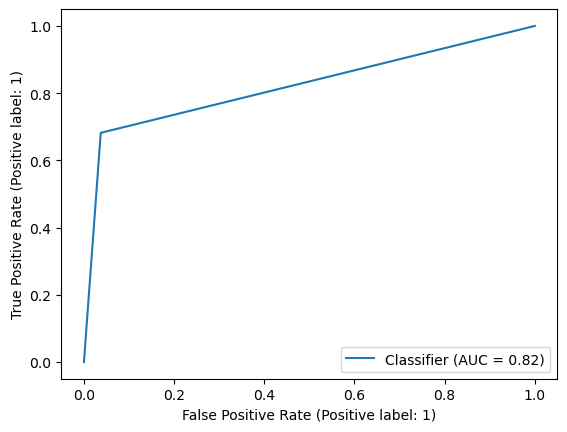

In [92]:
SampleSize=25000
clf = CategoricalNB()
clf.fit(pd.concat([X_train[y_train==1][:SampleSize],X_train[y_train==0]]), pd.concat([y_train[y_train==1][:SampleSize],y_train[y_train==0]]))
pred=clf.predict(X_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
print(sklearn.metrics.f1_score(y_test,pred))
print(sklearn.metrics.roc_auc_score(y_test,pred))
sklearn.metrics.RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

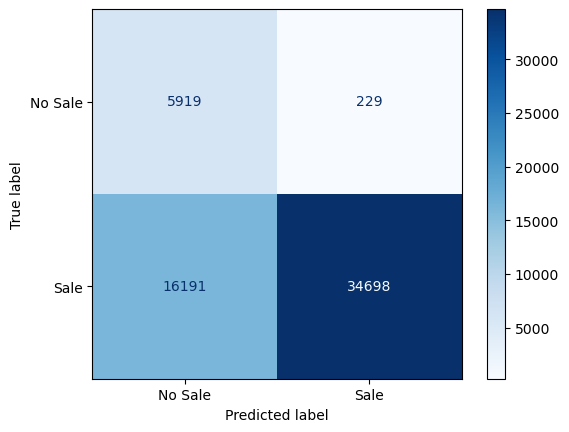

In [93]:
build_confusion_matrix(y_test,pred)

In [44]:
save_scikit_model("naive_bayes",clf)

<Axes: >

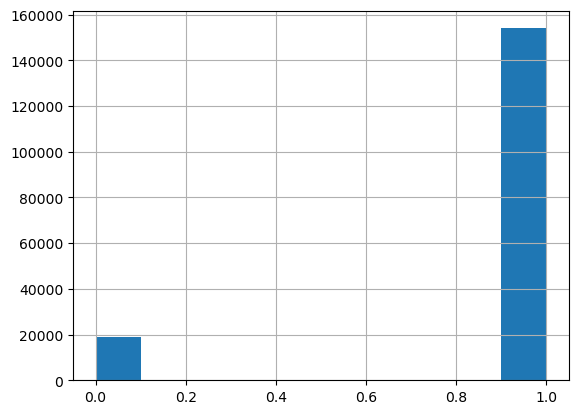

In [94]:
Data.sold.hist()

0.7325770990760384
[[ 5724   424]
 [14829 36060]]
0.8254266192073066
0.8198177778410212


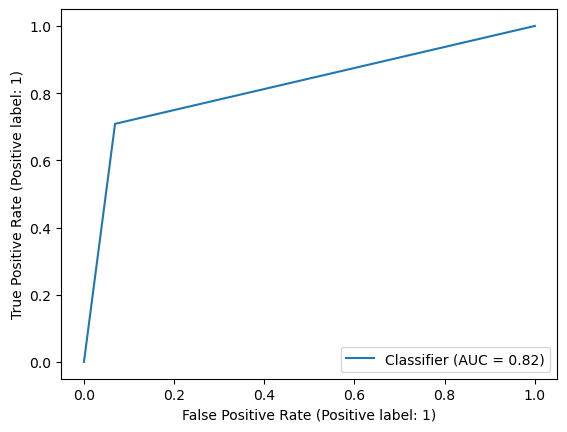

In [99]:
svr=SVC(class_weight="balanced")
svr.fit(X_train, y_train)
pred=svr.predict(X_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
print(sklearn.metrics.f1_score(y_test,pred))
print(sklearn.metrics.roc_auc_score(y_test,pred))
sklearn.metrics.RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

In [100]:
save_scikit_model("svc",svr)

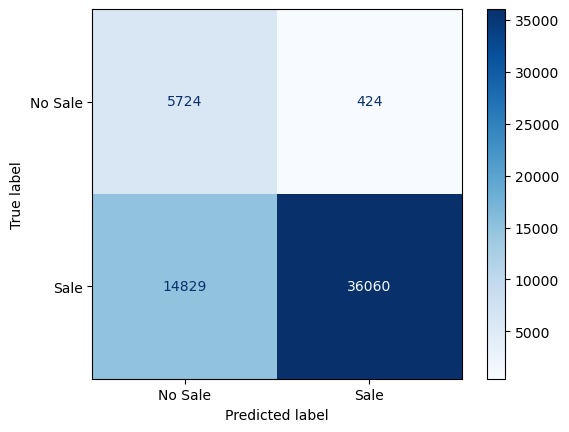

In [101]:
build_confusion_matrix(y_test,pred)

In [53]:
from sklearn.ensemble import RandomForestClassifier

0.9445272367059978
[[ 5095  1053]
 [ 2111 48778]]
0.9685861795075457
0.8936211731855238


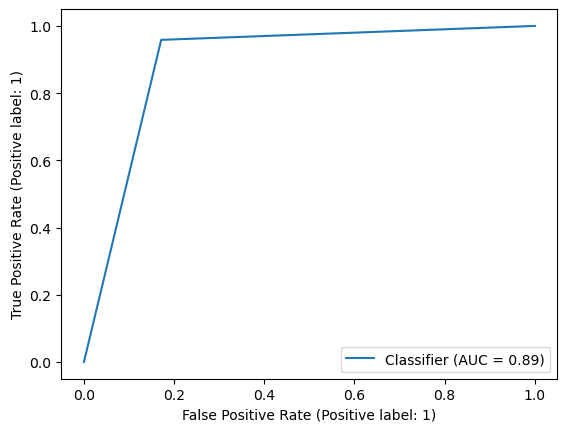

In [79]:
rf=RandomForestClassifier(n_estimators=1000,max_depth=20,class_weight="balanced")
rf.fit(X_train, y_train)
pred=rf.predict(X_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
print(sklearn.metrics.f1_score(y_test,pred))
print(sklearn.metrics.roc_auc_score(y_test,pred))
sklearn.metrics.RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

In [80]:
save_scikit_model("random_forest",rf)

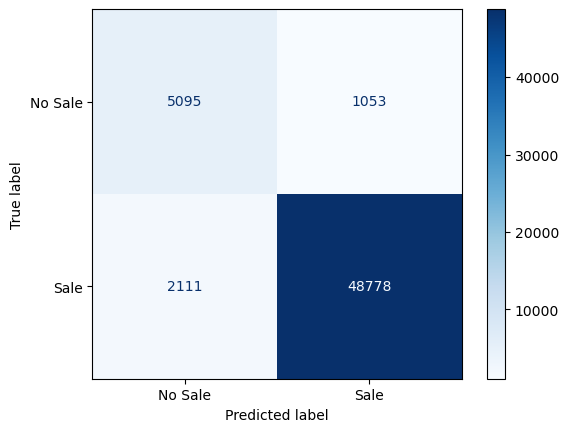

In [81]:
build_confusion_matrix(y_test,pred)

In [62]:
from xgboost import XGBClassifier

0.9119518908778512
[[ 5132  1016]
 [ 4006 46883]]
0.9491638660566061
0.8780113268582969


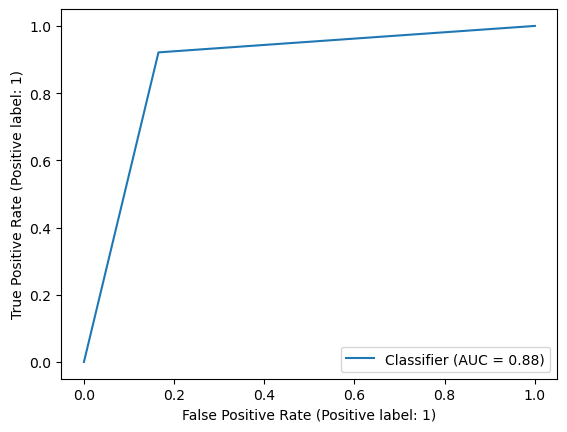

In [83]:
classes_weights = sklearn.utils.class_weight.compute_sample_weight(
    class_weight='balanced',
    y=y_train
)
bst = XGBClassifier(n_estimators=1000, max_depth=100, learning_rate=1, objective='binary:logistic')
bst.fit(X_train, y_train,sample_weight=classes_weights)
pred=bst.predict(X_test)
print(accuracy_score(y_test,pred))
print(sklearn.metrics.confusion_matrix(y_test,pred))
print(sklearn.metrics.f1_score(y_test,pred))
print(sklearn.metrics.roc_auc_score(y_test,pred))
sklearn.metrics.RocCurveDisplay.from_predictions(y_test, pred)
plt.show()

In [84]:
save_scikit_model("xgboost",bst)

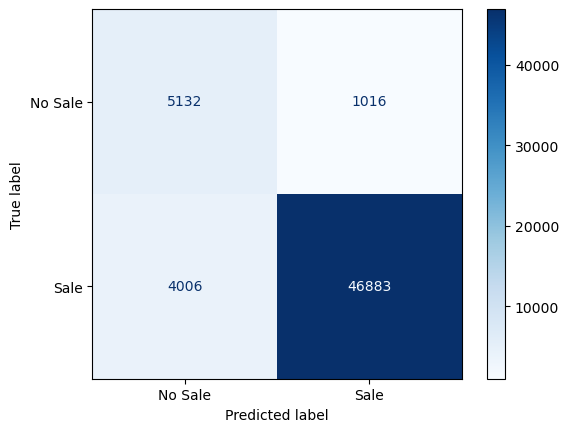

In [85]:
build_confusion_matrix(y_test,pred)

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [73]:
def build_confusion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Sale","Sale"])
    
    disp.plot(cmap=plt.cm.Blues)
    plt.show()

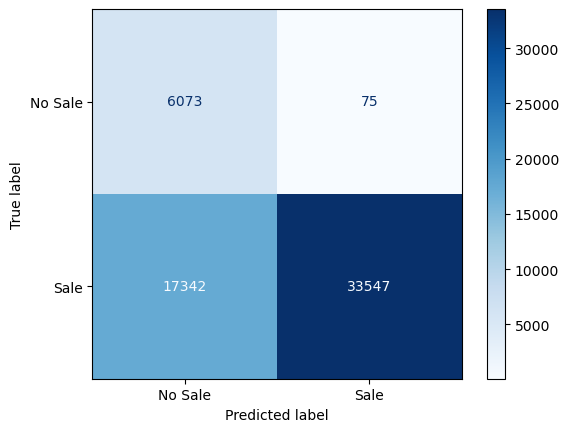

In [74]:
build_confusion_matrix(y_test,pred)